Описание задачи
Данный датасет содержет данный по всем матчам NBA в период с 2004 по 2022 года.
На основе предоставленных данных попытаться предсказать результаты матчей.
GAME_DATE_EST - Game's date
GAME_ID - ID of the game
HOME_TEAM_ID - ID of the home team
VISITOR_TEAM_ID - ID of the visitor team
SEASON - Season when the game occured
TEAM_ID_home - ID of the home team (dupplicate of HOME_TEAM_ID)
PTS_home - Number of points scored by home team
FG_PCT_home - Field Goal Percentage home team
FT_PCT_home - Free Throw Percentage of the home team
FG3_PCT_home - Three Point Percentageof the home team
AST_home - Assists of the home team
REB_home - Rebounds of the home team
TEAM_ID_away - ID of the away team (dupplicate of VISITOR_TEAM_ID)
PTS_away - Number of points scored by away team
FG_PCT_away - Field Goal Percentage away team
FT_PCT_away - Free Throw Percentage of the away team
FG3_PCT_away - Three Point Percentage of the away team
AST_away - Assists of the away team
REB_away - Rebounds of the away team
HOME_TEAM_WINS - If home team won the game

1. Прочтение данных 

In [95]:
import numpy as np              # Массивы (матрицы, векторы, линейная алгебра)
import matplotlib.pyplot as plt # Научная графика
import pandas as pd             # Таблицы и временные ряды (dataframe, series)
import seaborn as sns           # Еще больше красивой графики для визуализации данных
import sklearn                  # Алгоритмы машинного обучения

In [96]:
url = 'games.csv'
data_raw = pd.read_csv(url)

data_raw.shape

(25796, 21)

In [97]:
type(data_raw)

pandas.core.frame.DataFrame

In [98]:
print(data_raw)

      GAME_DATE_EST   GAME_ID GAME_STATUS_TEXT  HOME_TEAM_ID  VISITOR_TEAM_ID  \
0        2022-03-12  22101005            Final    1610612748       1610612750   
1        2022-03-12  22101006            Final    1610612741       1610612739   
2        2022-03-12  22101007            Final    1610612759       1610612754   
3        2022-03-12  22101008            Final    1610612744       1610612749   
4        2022-03-12  22101009            Final    1610612743       1610612761   
...             ...       ...              ...           ...              ...   
25791    2014-10-06  11400007            Final    1610612737       1610612740   
25792    2014-10-06  11400004            Final    1610612741       1610612764   
25793    2014-10-06  11400005            Final    1610612747       1610612743   
25794    2014-10-05  11400002            Final    1610612761       1610612758   
25795    2014-10-04  11400001            Final    1610612748       1610612740   

       SEASON  TEAM_ID_home

In [99]:
data_raw.head()

GAME_DATE_EST   GAME_ID GAME_STATUS_TEXT  HOME_TEAM_ID  VISITOR_TEAM_ID  \
0    2022-03-12  22101005            Final    1610612748       1610612750   
1    2022-03-12  22101006            Final    1610612741       1610612739   
2    2022-03-12  22101007            Final    1610612759       1610612754   
3    2022-03-12  22101008            Final    1610612744       1610612749   
4    2022-03-12  22101009            Final    1610612743       1610612761   

   SEASON  TEAM_ID_home  PTS_home  FG_PCT_home  FT_PCT_home  ...  AST_home  \
0    2021    1610612748     104.0        0.398        0.760  ...      23.0   
1    2021    1610612741     101.0        0.443        0.933  ...      20.0   
2    2021    1610612759     108.0        0.412        0.813  ...      28.0   
3    2021    1610612744     122.0        0.484        0.933  ...      33.0   
4    2021    1610612743     115.0        0.551        0.750  ...      32.0   

   REB_home  TEAM_ID_away  PTS_away  FG_PCT_away  FT_PCT_away  FG3_PCT_away  \
0      53.0    1610612750     113.0        0.422        0.875         0.357   
1      46.0    1610612739      91.0        0.419        0.824         0.208   
2      52.0    1610612754     119.0        0.489        1.000         0.389   
3      55.0    1610612749     109.0        0.413        0.696         0.386   
4      39.0    1610612761     127.0        0.471        0.760         0.387   

   AST_away  REB_away  HOME_TEAM_WINS  
0      21.0      46.0               0  
1      19.0      40.0               1  
2      23.0      47.0               0  
3      27.0      39.0               1  
4      28.0      50.0               0  

[5 rows x 21 columns]

In [100]:
data_raw.tail()

GAME_DATE_EST   GAME_ID GAME_STATUS_TEXT  HOME_TEAM_ID  VISITOR_TEAM_ID  \
25791    2014-10-06  11400007            Final    1610612737       1610612740   
25792    2014-10-06  11400004            Final    1610612741       1610612764   
25793    2014-10-06  11400005            Final    1610612747       1610612743   
25794    2014-10-05  11400002            Final    1610612761       1610612758   
25795    2014-10-04  11400001            Final    1610612748       1610612740   

       SEASON  TEAM_ID_home  PTS_home  FG_PCT_home  FT_PCT_home  ...  \
25791    2014    1610612737      93.0        0.419        0.821  ...   
25792    2014    1610612741      81.0        0.338        0.719  ...   
25793    2014    1610612747      98.0        0.448        0.682  ...   
25794    2014    1610612761      99.0        0.440        0.771  ...   
25795    2014    1610612748      86.0        0.431        0.679  ...   

       AST_home  REB_home  TEAM_ID_away  PTS_away  FG_PCT_away  FT_PCT_away  \
25791      24.0      50.0    1610612740      87.0        0.366        0.643   
25792      18.0      40.0    1610612764      85.0        0.411        0.636   
25793      29.0      45.0    1610612743      95.0        0.387        0.659   
25794      21.0      30.0    1610612758      94.0        0.469        0.725   
25795      18.0      42.0    1610612740      98.0        0.462        0.706   

       FG3_PCT_away  AST_away  REB_away  HOME_TEAM_WINS  
25791         0.375      17.0      43.0               1  
25792         0.267      17.0      47.0               0  
25793         0.500      19.0      43.0               1  
25794         0.385      18.0      45.0               1  
25795         0.438      19.0      42.0               0  

[5 rows x 21 columns]

In [101]:
data_raw.columns

Index(['GAME_DATE_EST', 'GAME_ID', 'GAME_STATUS_TEXT', 'HOME_TEAM_ID',
       'VISITOR_TEAM_ID', 'SEASON', 'TEAM_ID_home', 'PTS_home', 'FG_PCT_home',
       'FT_PCT_home', 'FG3_PCT_home', 'AST_home', 'REB_home', 'TEAM_ID_away',
       'PTS_away', 'FG_PCT_away', 'FT_PCT_away', 'FG3_PCT_away', 'AST_away',
       'REB_away', 'HOME_TEAM_WINS'],
      dtype='object')

In [102]:
data_raw['PTS_home'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005     71.0
0.010     74.0
0.050     82.0
0.100     87.0
0.500    103.0
0.900    120.0
0.950    125.0
0.990    136.0
0.995    140.0
Name: PTS_home, dtype: float64

In [103]:
rows_to_drop = data_raw[
    (data_raw['PTS_home'] < data_raw['PTS_home'].quantile(0.005)) | (data_raw['PTS_home'] > data_raw['PTS_home'].quantile(0.995))].index
data = data_raw.drop(rows_to_drop)
data.shape

(25579, 21)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


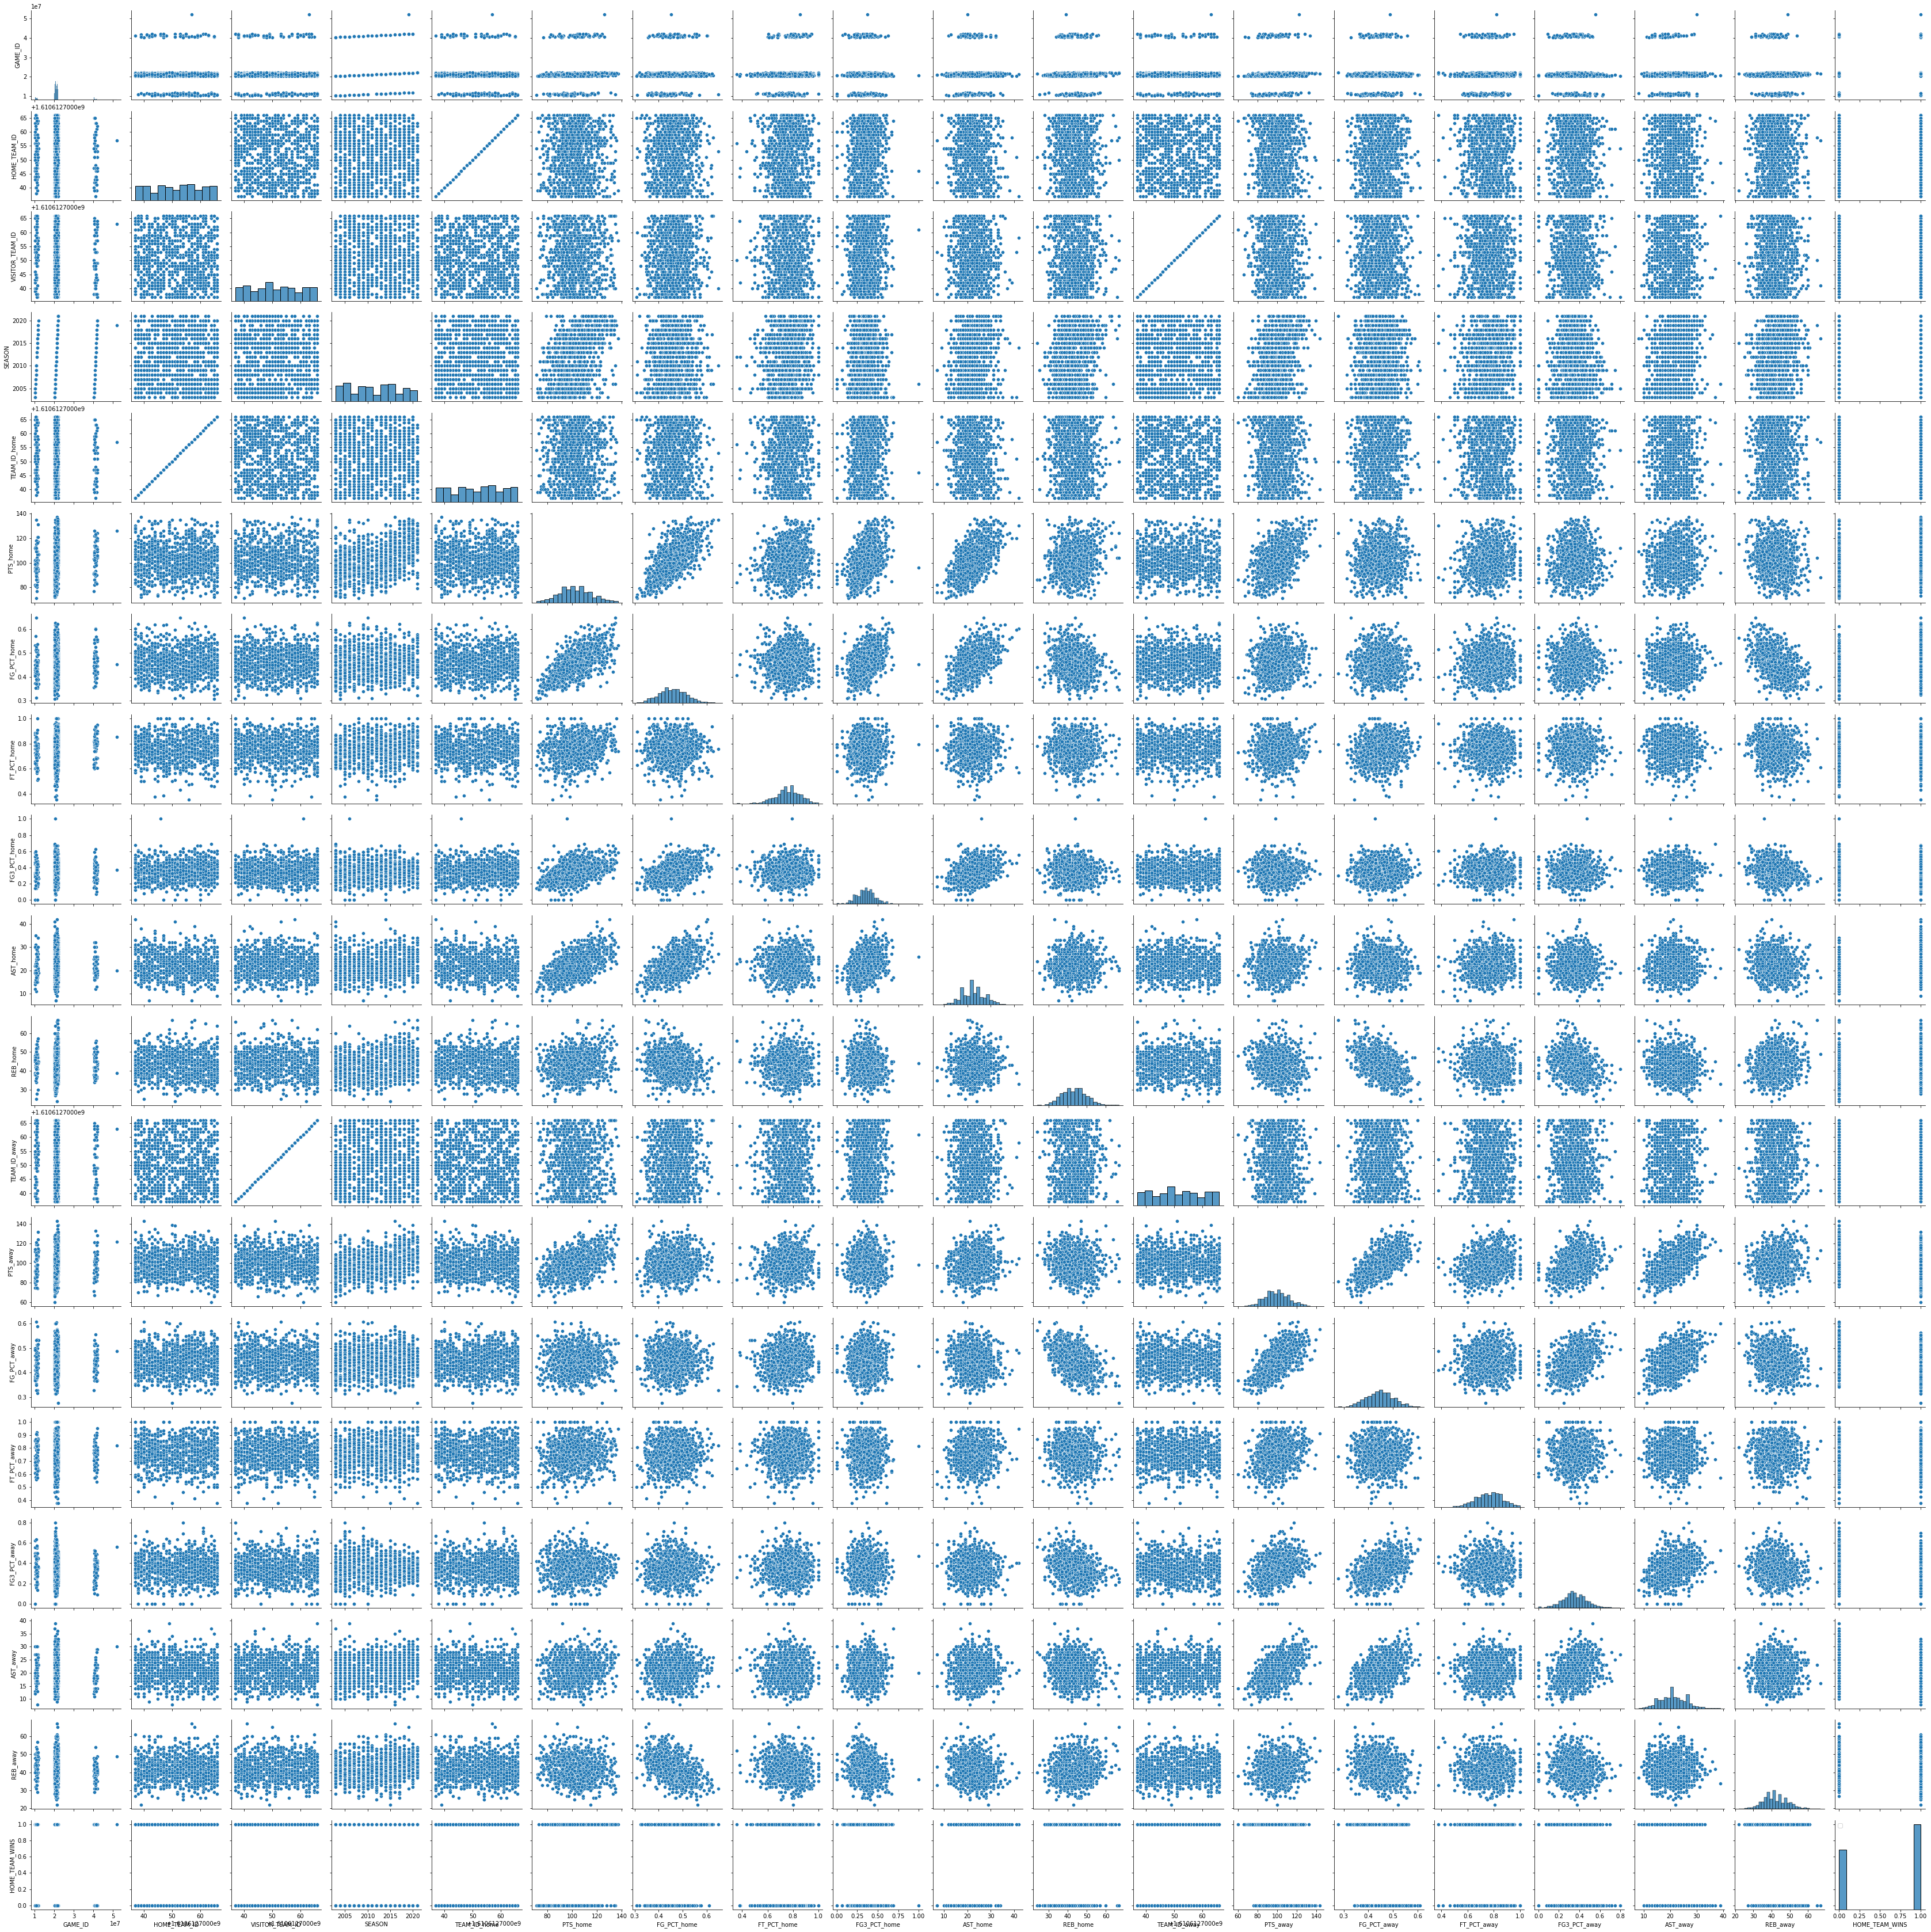

In [104]:
random_subset = np.random.choice(np.arange(data.shape[0]), size=1000, replace=False)
sns.pairplot(data.iloc[random_subset], diag_kind='hist')
plt.legend()
pass

In [105]:
data.corr()

GAME_ID  HOME_TEAM_ID  VISITOR_TEAM_ID    SEASON  \
GAME_ID          1.000000     -0.026670        -0.031964  0.095431   
HOME_TEAM_ID    -0.026670      1.000000        -0.045894  0.002141   
VISITOR_TEAM_ID -0.031964     -0.045894         1.000000  0.004043   
SEASON           0.095431      0.002141         0.004043  1.000000   
TEAM_ID_home    -0.026670      1.000000        -0.045894  0.002141   
PTS_home         0.032699     -0.019788         0.002096  0.338102   
FG_PCT_home      0.018120     -0.005692         0.038141  0.026334   
FT_PCT_home      0.035865     -0.008876         0.004440  0.063906   
FG3_PCT_home    -0.004081      0.005196         0.018290  0.016395   
AST_home        -0.034066     -0.095824         0.019684  0.183575   
REB_home        -0.008141     -0.024803        -0.002988  0.159865   
TEAM_ID_away    -0.031964     -0.045894         1.000000  0.004043   
PTS_away         0.002036     -0.004035        -0.032366  0.375028   
FG_PCT_away      0.005098      0.022862        -0.026489  0.070960   
FT_PCT_away      0.032807      0.015675        -0.018339  0.065266   
FG3_PCT_away    -0.003080      0.015879        -0.022042  0.019752   
AST_away        -0.043861     -0.065798        -0.012722  0.252818   
REB_away        -0.024027     -0.026609        -0.010864  0.204679   
HOME_TEAM_WINS   0.030483     -0.022450         0.031941 -0.034819   

                 TEAM_ID_home  PTS_home  FG_PCT_home  FT_PCT_home  \
GAME_ID             -0.026670  0.032699     0.018120     0.035865   
HOME_TEAM_ID         1.000000 -0.019788    -0.005692    -0.008876   
VISITOR_TEAM_ID     -0.045894  0.002096     0.038141     0.004440   
SEASON               0.002141  0.338102     0.026334     0.063906   
TEAM_ID_home         1.000000 -0.019788    -0.005692    -0.008876   
PTS_home            -0.019788  1.000000     0.651495     0.180858   
FG_PCT_home         -0.005692  0.651495     1.000000     0.012717   
FT_PCT_home         -0.008876  0.180858     0.012717     1.000000   
FG3_PCT_home         0.005196  0.416446     0.442130     0.025054   
AST_home            -0.095824  0.587951     0.538031     0.013274   
REB_home            -0.024803  0.155135    -0.199166    -0.055518   
TEAM_ID_away        -0.045894  0.002096     0.038141     0.004440   
PTS_away            -0.004035  0.469521     0.098149     0.072080   
FG_PCT_away          0.022862  0.124523     0.035687     0.046857   
FT_PCT_away          0.015675  0.066462     0.027762     0.036772   
FG3_PCT_away         0.015879  0.055180     0.012187     0.021842   
AST_away            -0.065798  0.200773     0.005099     0.028602   
REB_away            -0.026609 -0.137412    -0.465424    -0.114073   
HOME_TEAM_WINS      -0.022450  0.395631     0.428218     0.090480   

                 FG3_PCT_home  AST_home  REB_home  TEAM_ID_away  PTS_away  \
GAME_ID             -0.004081 -0.034066 -0.008141     -0.031964  0.002036   
HOME_TEAM_ID         0.005196 -0.095824 -0.024803     -0.045894 -0.004035   
VISITOR_TEAM_ID      0.018290  0.019684 -0.002988      1.000000 -0.032366   
SEASON               0.016395  0.183575  0.159865      0.004043  0.375028   
TEAM_ID_home         0.005196 -0.095824 -0.024803     -0.045894 -0.004035   
PTS_home             0.416446  0.587951  0.155135      0.002096  0.469521   
FG_PCT_home          0.442130  0.538031 -0.199166      0.038141  0.098149   
FT_PCT_home          0.025054  0.013274 -0.055518      0.004440  0.072080   
FG3_PCT_home         1.000000  0.343387 -0.092580      0.018290  0.036363   
AST_home             0.343387  1.000000  0.058574      0.019684  0.167562   
REB_home            -0.092580  0.058574  1.000000     -0.002988 -0.161994   
TEAM_ID_away         0.018290  0.019684 -0.002988      1.000000 -0.032366   
PTS_away             0.036363  0.167562 -0.161994     -0.032366  1.000000   
FG_PCT_away          0.005680  0.001677 -0.477584     -0.026489  0.671504   
FT_PCT_away          0.013667  0.023046 -0.117172     -0.018339  0.201188   
FG3_

In [106]:
corr_mat = data.corr()

In [107]:
corr_mat.where(np.triu(corr_mat > 0.3, k=1)).stack().sort_values(ascending=False)

HOME_TEAM_ID     TEAM_ID_home      1.000000
VISITOR_TEAM_ID  TEAM_ID_away      1.000000
PTS_away         FG_PCT_away       0.671504
PTS_home         FG_PCT_home       0.651495
PTS_away         AST_away          0.588963
PTS_home         AST_home          0.587951
FG_PCT_home      AST_home          0.538031
FG_PCT_away      AST_away          0.522277
PTS_home         PTS_away          0.469521
FG_PCT_home      FG3_PCT_home      0.442130
FG_PCT_away      FG3_PCT_away      0.434949
FG_PCT_home      HOME_TEAM_WINS    0.428218
PTS_home         FG3_PCT_home      0.416446
PTS_away         FG3_PCT_away      0.411609
PTS_home         HOME_TEAM_WINS    0.395631
SEASON           PTS_away          0.375028
FG3_PCT_home     AST_home          0.343387
SEASON           PTS_home          0.338102
FG3_PCT_away     AST_away          0.319506
dtype: float64

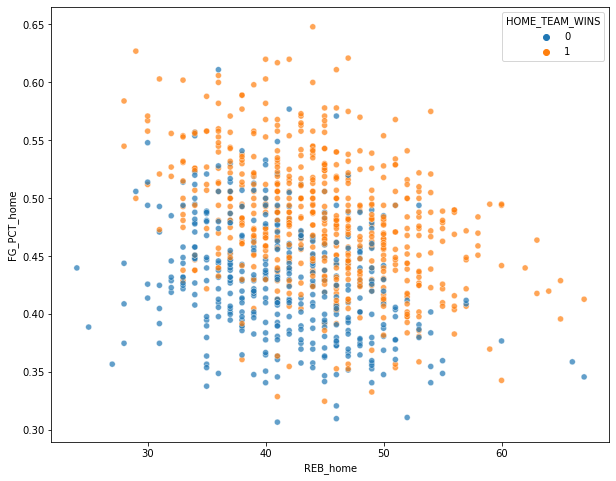

In [108]:
plt.figure(figsize = (10, 8))
sns.scatterplot(x='REB_home', y='FG_PCT_home', hue='HOME_TEAM_WINS', data=data.iloc[random_subset], alpha=0.7)
pass

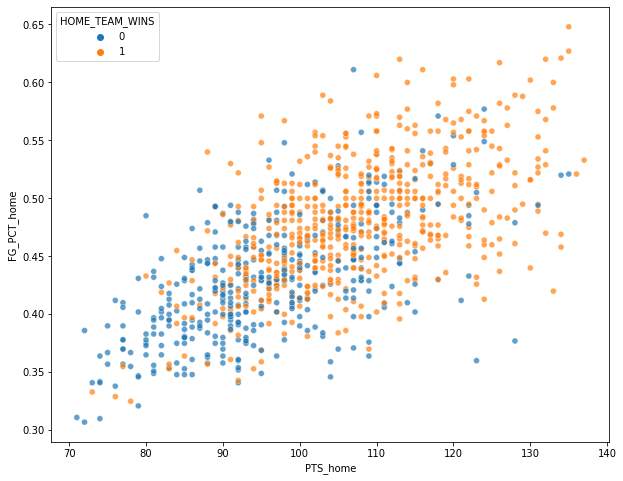

In [109]:
plt.figure(figsize = (10, 8))
sns.scatterplot(x='PTS_home', y='FG_PCT_home', hue='HOME_TEAM_WINS', data=data.iloc[random_subset], alpha=0.7)
pass

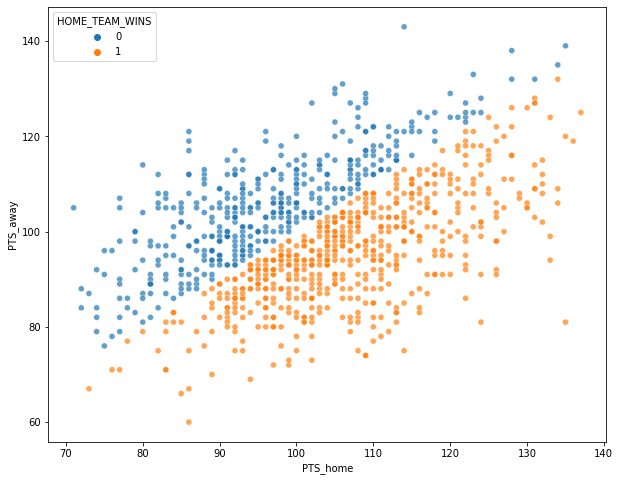

In [110]:
plt.figure(figsize = (10, 8))
sns.scatterplot(x='PTS_home', y='PTS_away', hue='HOME_TEAM_WINS', data=data.iloc[random_subset], alpha=0.7)
pass

3.Обработка пропущенных значений

In [111]:
data.isna().sum() 

GAME_DATE_EST        0
GAME_ID              0
GAME_STATUS_TEXT     0
HOME_TEAM_ID         0
VISITOR_TEAM_ID      0
SEASON               0
TEAM_ID_home         0
PTS_home            99
FG_PCT_home         99
FT_PCT_home         99
FG3_PCT_home        99
AST_home            99
REB_home            99
TEAM_ID_away         0
PTS_away            99
FG_PCT_away         99
FT_PCT_away         99
FG3_PCT_away        99
AST_away            99
REB_away            99
HOME_TEAM_WINS       0
dtype: int64

In [112]:
data['PTS_home'].fillna(data['PTS_home'].mode().iloc[0], inplace=True)
data['FG_PCT_home'].fillna(data['FG_PCT_home'].mode().iloc[0], inplace=True)
data['FT_PCT_home'].fillna(data['FT_PCT_home'].mode().iloc[0], inplace=True)
data['FG3_PCT_home'    ].fillna(data['FG3_PCT_home'    ].mode().iloc[0], inplace=True)
data['AST_home'].fillna(data['AST_home'].mode().iloc[0], inplace=True)
data['REB_home'    ].fillna(data['REB_home'    ].mode().iloc[0], inplace=True)
data['PTS_away'].fillna(data['PTS_away'].mode().iloc[0], inplace=True)
data['FG_PCT_away'    ].fillna(data['FG_PCT_away'    ].mode().iloc[0], inplace=True)
data['FT_PCT_away'].fillna(data['FT_PCT_away'].mode().iloc[0], inplace=True)
data['FG3_PCT_away'    ].fillna(data['FG3_PCT_away'    ].mode().iloc[0], inplace=True)
data['AST_away'].fillna(data['AST_away'].mode().iloc[0], inplace=True)
data['REB_away'    ].fillna(data['REB_away'    ].mode().iloc[0], inplace=True)

In [113]:
data.isna().sum()  

GAME_DATE_EST       0
GAME_ID             0
GAME_STATUS_TEXT    0
HOME_TEAM_ID        0
VISITOR_TEAM_ID     0
SEASON              0
TEAM_ID_home        0
PTS_home            0
FG_PCT_home         0
FT_PCT_home         0
FG3_PCT_home        0
AST_home            0
REB_home            0
TEAM_ID_away        0
PTS_away            0
FG_PCT_away         0
FT_PCT_away         0
FG3_PCT_away        0
AST_away            0
REB_away            0
HOME_TEAM_WINS      0
dtype: int64

4. Обработка категориальных признаков


In [114]:
data.describe()

GAME_ID  HOME_TEAM_ID  VISITOR_TEAM_ID        SEASON  \
count  2.557900e+04  2.557900e+04     2.557900e+04  25579.000000   
mean   2.168650e+07  1.610613e+09     1.610613e+09   2011.796865   
std    5.479320e+06  8.635903e+00     8.652590e+00      5.389354   
min    1.030000e+07  1.610613e+09     1.610613e+09   2003.000000   
25%    2.060110e+07  1.610613e+09     1.610613e+09   2007.000000   
50%    2.120040e+07  1.610613e+09     1.610613e+09   2012.000000   
75%    2.170067e+07  1.610613e+09     1.610613e+09   2016.000000   
max    5.200021e+07  1.610613e+09     1.610613e+09   2021.000000   

       TEAM_ID_home      PTS_home   FG_PCT_home   FT_PCT_home  FG3_PCT_home  \
count  2.557900e+04  25579.000000  25579.000000  25579.000000  25579.000000   
mean   1.610613e+09    103.088823      0.460628      0.759696      0.355938   
std    8.635903e+00     12.680743      0.055757      0.100391      0.111316   
min    1.610613e+09     71.000000      0.269000      0.143000      0.000000   
25%    1.610613e+09     94.000000      0.422000      0.697000      0.286000   
50%    1.610613e+09    103.000000      0.460000      0.765000      0.355000   
75%    1.610613e+09    112.000000      0.500000      0.828000      0.429000   
max    1.610613e+09    140.000000      0.684000      1.000000      1.000000   

           AST_home      REB_home  TEAM_ID_away      PTS_away   FG_PCT_away  \
count  25579.000000  25579.000000  2.557900e+04  25579.000000  25579.000000   
mean      22.730873     43.336643  1.610613e+09    100.239415      0.449449   
std        5.100941      6.601891  8.652590e+00     13.159421      0.055471   
min        6.000000     15.000000  1.610613e+09     54.000000      0.244000   
25%       19.000000     39.000000  1.610613e+09     91.000000      0.412000   
50%       23.000000     43.000000  1.610613e+09    100.000000      0.449000   
75%       26.000000     48.000000  1.610613e+09    109.000000      0.487000   
max       42.000000     72.000000  1.610613e+09    158.000000      0.687000   

        FT_PCT_away  FG3_PCT_away      AST_away      REB_away  HOME_TEAM_WINS  
count  25579.000000  25579.000000  25579.000000  25579.000000     25579.00000  
mean       0.758028      0.349231     21.386137     42.068142         0.58853  
std        0.103264      0.109892      5.117072      6.498904         0.49211  
min        0.143000      0.000000      4.000000     20.000000         0.00000  
25%        0.692000      0.278000     18.000000     38.000000         0.00000  
50%        0.762000      0.348000     21.000000     42.000000         1.00000  
75%        0.829000      0.419000     25.000000     46.000000         1.00000  
max        1.000000      1.000000     46.000000     81.000000         1.00000

In [115]:
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
numerical_columns   = [c for c in data.columns if data[c].dtype.name != 'object']
print(categorical_columns)
print(numerical_columns)

['GAME_DATE_EST', 'GAME_STATUS_TEXT']
['GAME_ID', 'HOME_TEAM_ID', 'VISITOR_TEAM_ID', 'SEASON', 'TEAM_ID_home', 'PTS_home', 'FG_PCT_home', 'FT_PCT_home', 'FG3_PCT_home', 'AST_home', 'REB_home', 'TEAM_ID_away', 'PTS_away', 'FG_PCT_away', 'FT_PCT_away', 'FG3_PCT_away', 'AST_away', 'REB_away', 'HOME_TEAM_WINS']


In [116]:
data_describe = data.describe(include = [object])
binary_columns    = [c for c in categorical_columns if data_describe[c]['unique'] == 2]
nonbinary_columns = [c for c in categorical_columns if data_describe[c]['unique'] > 0]
print(binary_columns, nonbinary_columns)

[] ['GAME_DATE_EST', 'GAME_STATUS_TEXT']


In [117]:
data['GAME_DATE_EST'].unique()

array(['2022-03-12', '2022-03-11', '2022-03-10', ..., '2014-10-06',
       '2014-10-05', '2014-10-04'], dtype=object)

In [118]:
data[nonbinary_columns]

GAME_DATE_EST GAME_STATUS_TEXT
0        2022-03-12            Final
1        2022-03-12            Final
2        2022-03-12            Final
3        2022-03-12            Final
4        2022-03-12            Final
...             ...              ...
25791    2014-10-06            Final
25792    2014-10-06            Final
25793    2014-10-06            Final
25794    2014-10-05            Final
25795    2014-10-04            Final

[25579 rows x 2 columns]

In [119]:
data_nonbinary = pd.get_dummies(data[nonbinary_columns])
print(data_nonbinary.columns)
len(data_nonbinary.columns)

Index(['GAME_DATE_EST_2003-10-05', 'GAME_DATE_EST_2003-10-06',
       'GAME_DATE_EST_2003-10-07', 'GAME_DATE_EST_2003-10-08',
       'GAME_DATE_EST_2003-10-09', 'GAME_DATE_EST_2003-10-10',
       'GAME_DATE_EST_2003-10-11', 'GAME_DATE_EST_2003-10-12',
       'GAME_DATE_EST_2003-10-13', 'GAME_DATE_EST_2003-10-14',
       ...
       'GAME_DATE_EST_2022-03-04', 'GAME_DATE_EST_2022-03-05',
       'GAME_DATE_EST_2022-03-06', 'GAME_DATE_EST_2022-03-07',
       'GAME_DATE_EST_2022-03-08', 'GAME_DATE_EST_2022-03-09',
       'GAME_DATE_EST_2022-03-10', 'GAME_DATE_EST_2022-03-11',
       'GAME_DATE_EST_2022-03-12', 'GAME_STATUS_TEXT_Final'],
      dtype='object', length=4144)


4144

6. Разбить данные на обучающую и тестовую выборки


In [120]:
data_numerical = data[numerical_columns]
data_numerical.describe()

GAME_ID  HOME_TEAM_ID  VISITOR_TEAM_ID        SEASON  \
count  2.557900e+04  2.557900e+04     2.557900e+04  25579.000000   
mean   2.168650e+07  1.610613e+09     1.610613e+09   2011.796865   
std    5.479320e+06  8.635903e+00     8.652590e+00      5.389354   
min    1.030000e+07  1.610613e+09     1.610613e+09   2003.000000   
25%    2.060110e+07  1.610613e+09     1.610613e+09   2007.000000   
50%    2.120040e+07  1.610613e+09     1.610613e+09   2012.000000   
75%    2.170067e+07  1.610613e+09     1.610613e+09   2016.000000   
max    5.200021e+07  1.610613e+09     1.610613e+09   2021.000000   

       TEAM_ID_home      PTS_home   FG_PCT_home   FT_PCT_home  FG3_PCT_home  \
count  2.557900e+04  25579.000000  25579.000000  25579.000000  25579.000000   
mean   1.610613e+09    103.088823      0.460628      0.759696      0.355938   
std    8.635903e+00     12.680743      0.055757      0.100391      0.111316   
min    1.610613e+09     71.000000      0.269000      0.143000      0.000000   
25%    1.610613e+09     94.000000      0.422000      0.697000      0.286000   
50%    1.610613e+09    103.000000      0.460000      0.765000      0.355000   
75%    1.610613e+09    112.000000      0.500000      0.828000      0.429000   
max    1.610613e+09    140.000000      0.684000      1.000000      1.000000   

           AST_home      REB_home  TEAM_ID_away      PTS_away   FG_PCT_away  \
count  25579.000000  25579.000000  2.557900e+04  25579.000000  25579.000000   
mean      22.730873     43.336643  1.610613e+09    100.239415      0.449449   
std        5.100941      6.601891  8.652590e+00     13.159421      0.055471   
min        6.000000     15.000000  1.610613e+09     54.000000      0.244000   
25%       19.000000     39.000000  1.610613e+09     91.000000      0.412000   
50%       23.000000     43.000000  1.610613e+09    100.000000      0.449000   
75%       26.000000     48.000000  1.610613e+09    109.000000      0.487000   
max       42.000000     72.000000  1.610613e+09    158.000000      0.687000   

        FT_PCT_away  FG3_PCT_away      AST_away      REB_away  HOME_TEAM_WINS  
count  25579.000000  25579.000000  25579.000000  25579.000000     25579.00000  
mean       0.758028      0.349231     21.386137     42.068142         0.58853  
std        0.103264      0.109892      5.117072      6.498904         0.49211  
min        0.143000      0.000000      4.000000     20.000000         0.00000  
25%        0.692000      0.278000     18.000000     38.000000         0.00000  
50%        0.762000      0.348000     21.000000     42.000000         1.00000  
75%        0.829000      0.419000     25.000000     46.000000         1.00000  
max        1.000000      1.000000     46.000000     81.000000         1.00000

In [121]:
x = data.drop(['GAME_DATE_EST','GAME_STATUS_TEXT', 'HOME_TEAM_WINS'], axis = 1)
y = data['HOME_TEAM_WINS']


In [122]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

N_train, N_test

(19184, 6395)

7. Запустить классификатор ближайших соседей

In [123]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [124]:
knn

KNeighborsClassifier(n_neighbors=10)

In [125]:
y_test_predict = knn.predict(X_test)
err_test  = np.mean(y_test  != y_test_predict)


In [126]:
err_test

0.4111024237685692

In [127]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_test_predict))

[[1159 1478]
 [1151 2607]]


In [128]:
confusion_matrix([0,1,0,1,0], [0,1,0,0,0])

array([[3, 0],
       [1, 1]], dtype=int64)

8. Оценка ошибки.

In [129]:
from sklearn.model_selection import GridSearchCV
nnb = [1, 3, 5, 10, 15, 20, 25, 35, 45, 55]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=10)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_err, best_n_neighbors)

0.38698778636987785 25


In [130]:
knn = KNeighborsClassifier(n_neighbors = best_n_neighbors).fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print(err_train, err_test)

0.35597372810675565 0.3743549648162627


Обучение полносвязанной нейронной сети.

Статистика показывает, что каждый год средняя результативность команд НБА растет. В текущем сезоне команды набирают в среднем 110,6 очка, а в сезоне 2009-2010 команды набирают в среднем 100,4 очка. Задача нейронной сети определить по данным статистике к какому сезону относится данная игра.

In [131]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
%matplotlib inline

In [132]:
mlp_model = MLPClassifier(hidden_layer_sizes = (100,),
                          solver = 'lbfgs', 
                          activation = 'logistic',
                          random_state = 42)

In [133]:
%%time
mlp_model.fit(X_train, y_train)

CPU times: total: 3.58 s
Wall time: 599 ms


MLPClassifier(activation='logistic', random_state=42, solver='lbfgs')

In [134]:
y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)

In [135]:
print(np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred))

0.41117597998331945 0.41235340109460517


In [177]:
alpha_arr = np.logspace(6, 8, 20)
test_err = []
train_err = []
train_acc = []
test_acc = []

for alpha in alpha_arr:
    mlp_model = MLPClassifier(alpha = alpha, hidden_layer_sizes = (100,), 
                              solver = 'lbfgs', activation = 'logistic', max_iter=1000, random_state = 42)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    train_acc.append(accuracy_score(y_train, y_train_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))

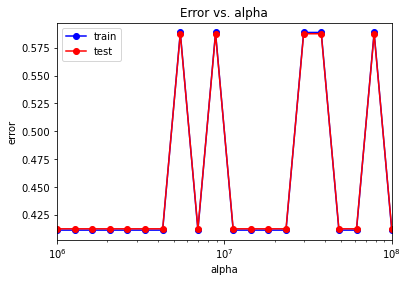

In [178]:
plt.semilogx(alpha_arr, train_err, 'b-o', label = 'train')
plt.semilogx(alpha_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('Error vs. alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()

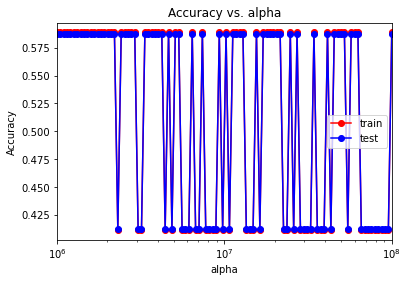

In [156]:
plt.semilogx(alpha_arr, train_acc, 'r-o', label = 'train')
plt.semilogx(alpha_arr, test_acc, 'b-o', label = 'test')
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('Accuracy vs. alpha')
plt.xlabel('alpha')
plt.ylabel('Accuracy')
plt.legend()

In [157]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.41117597998331945 0.41235340109460517


In [158]:
alpha_opt = alpha_arr[test_err == min_test_err]
print(alpha_opt)

[1.00000000e+06 1.04761575e+06 1.09749877e+06 1.14975700e+06
 1.20450354e+06 1.26185688e+06 1.32194115e+06 1.38488637e+06
 1.45082878e+06 1.51991108e+06 1.59228279e+06 1.66810054e+06
 1.74752840e+06 1.83073828e+06 1.91791026e+06 2.00923300e+06
 2.10490414e+06 2.20513074e+06 2.42012826e+06 2.53536449e+06
 2.65608778e+06 2.78255940e+06 2.91505306e+06 3.35160265e+06
 3.51119173e+06 3.67837977e+06 3.85352859e+06 4.03701726e+06
 4.22924287e+06 4.64158883e+06 5.09413801e+06 5.33669923e+06
 6.42807312e+06 7.39072203e+06 9.32603347e+06 1.02353102e+07
 1.12332403e+07 1.17681195e+07 1.23284674e+07 1.29154967e+07
 1.55567614e+07 1.70735265e+07 1.78864953e+07 1.87381742e+07
 1.96304065e+07 2.05651231e+07 2.15443469e+07 2.47707636e+07
 2.71858824e+07 3.43046929e+07 4.13201240e+07 4.53487851e+07
 4.75081016e+07 4.97702356e+07 5.21400829e+07 5.72236766e+07
 5.99484250e+07 6.28029144e+07 1.00000000e+08]


In [159]:
alpha_opt = alpha_opt[0]

In [160]:
mlp_model = MLPClassifier(alpha = alpha_opt, hidden_layer_sizes = (100,),
                          solver = 'lbfgs', activation = 'logistic', random_state = 42)
mlp_model.fit(X_train, y_train)

y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)
print(np.mean(y_train != y_train_pred))
print(np.mean(y_test != y_test_pred))

0.41117597998331945
0.41235340109460517


In [161]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test_pred, y_test))

[[   0    0]
 [2637 3758]]


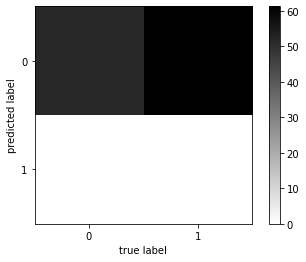

In [169]:
M = confusion_matrix(y_test_pred, y_test)
M = np.sqrt(M)
plt.imshow(M, interpolation = 'nearest')
plt.set_cmap('binary')
plt.xticks(range(2))
plt.yticks(range(2))
plt.xlabel("true label")
plt.ylabel("predicted label")
plt.colorbar()
pass

In [179]:
neuron_count_array = np.linspace(1, 50, 50).astype(int)
test_error = []
train_error = []
test_acc = []
train_acc = []

for neuron_count in neuron_count_array:
    mlp_model = MLPClassifier(alpha = alpha, hidden_layer_sizes = (neuron_count,), 
                              solver = 'lbfgs', activation = 'logistic', max_iter=1000, random_state = 42)

    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)

    test_error.append(np.mean(y_test != y_test_pred))
    train_error.append(np.mean(y_train != y_train_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))
    train_acc.append(accuracy_score(y_train, y_train_pred)) 

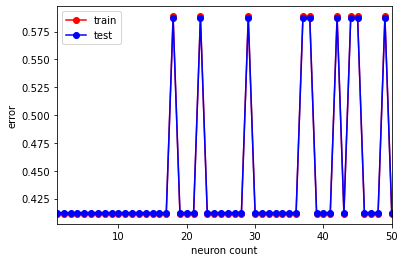

In [180]:
plt.plot(neuron_count_array, train_error, 'r-o', label='train')
plt.plot(neuron_count_array, test_error, 'b-o', label='test')
plt.xlim([np.min(neuron_count_array), np.max(neuron_count_array)])
plt.xlabel('neuron count')
plt.ylabel('error')
plt.legend()

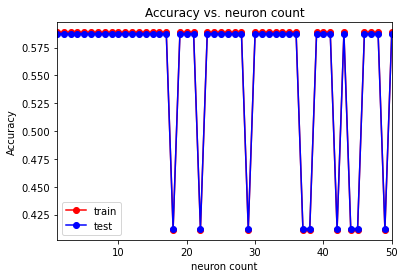

In [181]:
plt.plot(neuron_count_array, train_acc, 'r-o', label='train')
plt.plot(neuron_count_array, test_acc, 'b-o', label='test')
plt.xlim([np.min(neuron_count_array), np.max(neuron_count_array)])
plt.title('Accuracy vs. neuron count')
plt.xlabel('neuron count')
plt.ylabel('Accuracy')
plt.legend()


In [182]:
min_train_error = np.min(train_error)
min_test_error = np.min(test_error)
print(min_train_error, min_test_error)

0.41117597998331945 0.41235340109460517


In [183]:
neuron_opt = neuron_count_array[test_error == min_test_error]
print(neuron_opt)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 19 20 21 23 24 25 26
 27 28 30 31 32 33 34 35 36 39 40 41 43 46 47 48 50]


In [184]:
neuron_opt = neuron_opt[0]

In [185]:
mlp_model = MLPClassifier(alpha = alpha, hidden_layer_sizes = (neuron_count,), 
                              solver = 'lbfgs', activation = 'logistic', max_iter=1000, random_state = 42)
mlp_model.fit(X_train, y_train)

y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)
print(np.mean(y_train != y_train_pred))
print(np.mean(y_test != y_test_pred))

0.41117597998331945
0.41235340109460517


Выводы:

In [ ]:
1. Существует корреляция между точностью тестового набора и количеством нейронов
2.  Получены оптимальные значения гиперпараметров альфа = 0, 
оптимальное количество нейронов = 1. Значение минимальной погрешности на тестовом образце составляет 41,23%